In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import yfinance as yf
start = '2014-01-01'
end = '2024-02-16'
stock = 'WIPRO.BO'

df= yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,210.675003,210.787506,206.587494,207.281250,180.068939,182717
2014-01-02,207.375000,208.762497,204.750000,207.337494,180.117813,265807
2014-01-03,206.399994,209.606247,205.312500,208.931244,181.502304,251855
2014-01-06,209.399994,211.649994,208.143753,209.268753,181.795517,476797
2014-01-07,209.512497,209.512497,205.031250,206.231247,179.156784,267015
...,...,...,...,...,...,...
2024-02-09,489.350006,494.549988,482.500000,490.299988,490.299988,502422
2024-02-12,490.700012,510.649994,490.700012,501.399994,501.399994,815898
2024-02-13,502.049988,513.150024,491.649994,512.150024,512.150024,453541


In [4]:
df1=df.Close.resample('MS').mean()
df1

Date
2014-01-01    210.990488
2014-02-01    213.392764
2014-03-01    210.287813
2014-04-01    206.728124
2014-05-01    190.101788
                 ...    
2023-10-01    399.610001
2023-11-01    391.892502
2023-12-01    435.760005
2024-01-01    468.384998
2024-02-01    496.018180
Freq: MS, Name: Close, Length: 122, dtype: float64

In [5]:
#!pip install yfinance streamlit matplotlib

## ARIMA 

In [6]:
import matplotlib.pyplot as plt
df1=pd.read_csv('WiproN_close.csv')
df1= df1[['Close']]
df1

,Close
0,210.990488
1,213.392764
2,210.287813
3,206.728124
4,190.101788
...,...
117,399.610001
118,391.892502
119,435.760005
120,468.384998


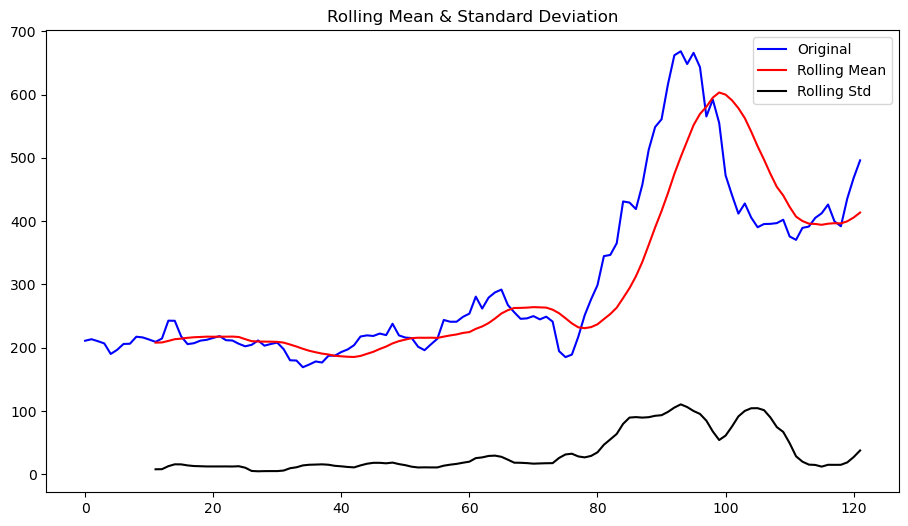

In [7]:
rolLmean = df1['Close'].rolling(12).mean() # 12 entries
rolLstd = df1['Close'].rolling(12).std()

plt.figure(figsize=(11,6))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(df1['Close'], color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [8]:
df1['Close'].rolling(12).mean().head(14)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11    207.989043
12    208.278898
13    210.722977
Name: Close, dtype: float64

In [9]:
df1['Close'].rolling(12).std()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
117    14.905653
118    14.967697
119    18.778665
120    27.229986
121    37.618893
Name: Close, Length: 122, dtype: float64

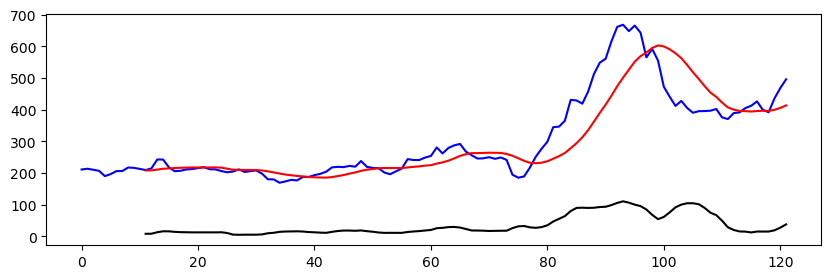

In [10]:
rolLmean = df1['Close'].rolling(12).mean() # 12 entries
rolLstd = df1['Close'].rolling(12).std()

plt.figure(figsize=(10,3))
fig = plt.figure(1)

orig = plt.plot(df1['Close'], color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')

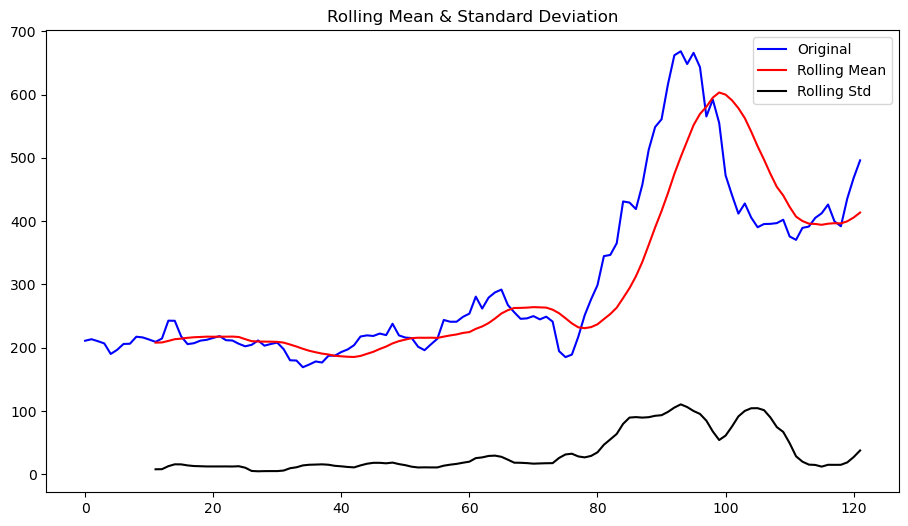

In [11]:
rolLmean = df1['Close'].rolling(12).mean() # 12 entries
rolLstd = df1['Close'].rolling(12).std()

plt.figure(figsize=(11,6))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(df1['Close'], color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

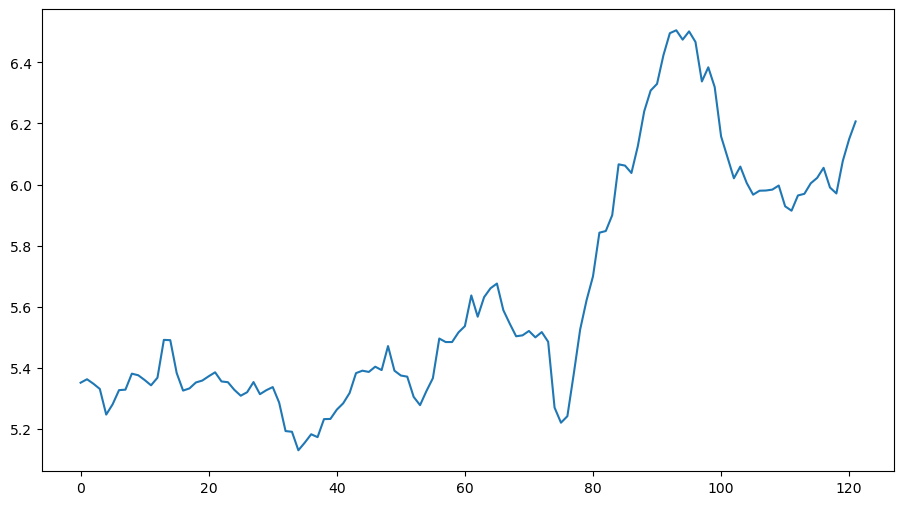

In [12]:
plt.figure(figsize=(11,6))
fig = plt.figure(1)

ts_log = np.log(df1['Close'])#to transform to stationary from non-stationary
plt.plot(ts_log)

In [13]:
import itertools
p = range(0,5) #AR order
d = range(0,5) #Shift
q = range(0,5) #MA order
pdq = list(itertools.product(p,d,q))
print(len(pdq))
pdq

125


[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [14]:
train = df1.head(98)
test = df1.tail(24)

In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [16]:
for param in pdq:
    try:
        model_arima = ARIMA(df1_train['Close'],order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

In [17]:
## SES

import warnings; warnings.simplefilter(action='ignore', category=Warning)

In [18]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [19]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_percentage_error

In [20]:
# Forecast - Based on current time

ses_model = SimpleExpSmoothing(train["Close"]).fit(smoothing_level= 0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
ses_rms = mean_absolute_percentage_error(pred_ses, test['Close'])*100
ses_rms

28.184235629763915

In [21]:
from statsmodels.tsa.arima.model import ARIMA

ARIMAmodel = ARIMA(train['Close'], order=(2,3,2)) #notice p,d and q value here # student run with (2,3,2)
ARIMA_model_fit = ARIMAmodel.fit()

ARIMA_pred = ARIMA_model_fit.predict(1,24,typ='levels')

arima_rms= mean_absolute_percentage_error(ARIMA_pred,test['Close'])*100
arima_rms

98.80141634592032

In [22]:
from pmdarima import auto_arima 

In [23]:
import warnings 
warnings.filterwarnings("ignore") 

In [24]:
train = df1.iloc[:len(df1)-12] 
test = df1.iloc[len(df1)-12:] # set one year(12 months) for testing 

In [25]:
# Split data into train / test sets 

train = df1.iloc[:len(df1)-12] 
test = df1.iloc[len(df1)-12:] # set one year(12 months) for testing 

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 24) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 

model = SARIMAX (train['Close'],
                 order = (0, 1, 1),
                 seasonal_order =(2,3,2,12))
  
result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   Close   No. Observations:                  110
Model:             SARIMAX(0, 1, 1)x(2, 3, [1, 2], 12)   Log Likelihood                -388.379
Date:                                 Mon, 26 Feb 2024   AIC                            788.757
Time:                                         17:13:23   BIC                            802.500
Sample:                                              0   HQIC                           794.234
                                                 - 110                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5238      0.110      4.743      0.000       0.307       0.740
ar.S.L12      -1.4605      1.267     -1.153      0.249      -3.944       1.023
ar.S.L24      -0.4619      0.981     -0.471      0.638      -2.384       1.461
ma.S.L12       0.5007      4.498      0.111      0.911      -8.316       9.318
ma.S.L24      -0.4376      1.749     -0.250      0.802      -3.865       2.990
sigma2       733.0422   2309.311      0.317      0.751   -3793.125    5259.209
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.23
Prob(Q):                              0.94   Prob(JB):                         0.20
Heteroskedasticity (H):               9.66   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

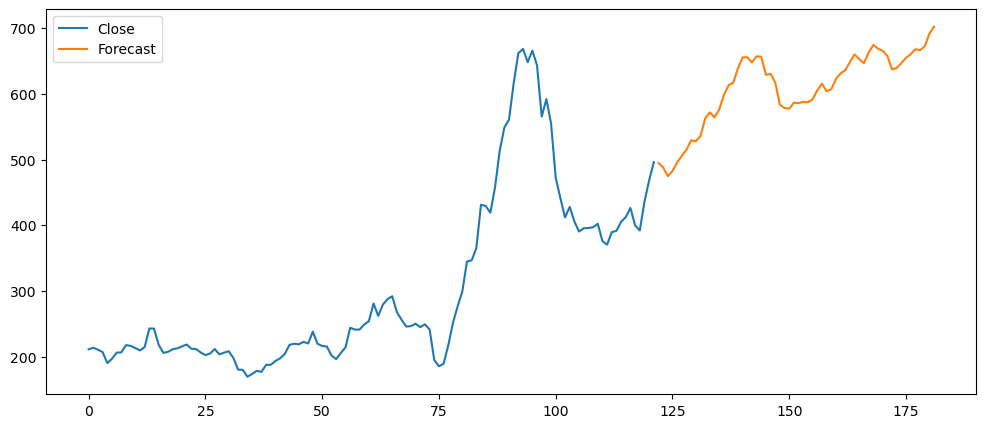

In [26]:
## Forecast using ARIMA Model

# Train the model on the full dataset 
model = model = SARIMAX(df1['Close'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 24)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(df1),  
                          end = (len(df1)-1) + 5 * 12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
df1['Close'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True)

In [27]:
df1['Close']

0      210.990488
1      213.392764
2      210.287813
3      206.728124
4      190.101788
          ...    
117    399.610001
118    391.892502
119    435.760005
120    468.384998
121    496.018180
Name: Close, Length: 122, dtype: float64

In [28]:
x =df1['Close']
x= pd.DataFrame(x)
x

,Close
0,210.990488
1,213.392764
2,210.287813
3,206.728124
4,190.101788
...,...
117,399.610001
118,391.892502
119,435.760005
120,468.384998


In [29]:
forecast

122    494.772072
123    488.311006
124    474.683644
125    482.545823
126    495.534183
127    505.706057
128    515.032894
129    529.309550
130    527.826935
131    535.940404
132    562.605205
133    571.699312
134    564.318496
135    576.056193
136    598.190092
137    613.109990
138    616.883226
139    638.492879
140    655.573674
141    655.681983
142    647.829388
143    657.123190
144    656.689559
145    628.951856
146    630.577391
147    617.065450
148    583.462587
149    578.333018
150    577.421486
151    586.565401
152    585.920636
153    587.697077
154    587.281583
155    591.754011
156    605.619534
157    615.578806
158    603.973090
159    607.082189
160    622.931707
161    631.217585
162    636.065471
163    648.583943
164    660.091903
165    652.580677
166    646.791403
167    663.227018
168    674.618094
169    668.838200
170    665.609537
171    657.715843
172    637.168577
173    639.552544
174    646.756542
175    655.008847
176    660.409675
177    668

In [30]:
y= forecast
y

122    494.772072
123    488.311006
124    474.683644
125    482.545823
126    495.534183
127    505.706057
128    515.032894
129    529.309550
130    527.826935
131    535.940404
132    562.605205
133    571.699312
134    564.318496
135    576.056193
136    598.190092
137    613.109990
138    616.883226
139    638.492879
140    655.573674
141    655.681983
142    647.829388
143    657.123190
144    656.689559
145    628.951856
146    630.577391
147    617.065450
148    583.462587
149    578.333018
150    577.421486
151    586.565401
152    585.920636
153    587.697077
154    587.281583
155    591.754011
156    605.619534
157    615.578806
158    603.973090
159    607.082189
160    622.931707
161    631.217585
162    636.065471
163    648.583943
164    660.091903
165    652.580677
166    646.791403
167    663.227018
168    674.618094
169    668.838200
170    665.609537
171    657.715843
172    637.168577
173    639.552544
174    646.756542
175    655.008847
176    660.409675
177    668

In [31]:
y = forecast
y = pd.DataFrame(y)
y

,Forecast
122,494.772072
123,488.311006
124,474.683644
125,482.545823
126,495.534183
127,505.706057
128,515.032894
129,529.309550
130,527.826935
131,535.940404


In [32]:
y

,Forecast
122,494.772072
123,488.311006
124,474.683644
125,482.545823
126,495.534183
127,505.706057
128,515.032894
129,529.309550
130,527.826935
131,535.940404


In [33]:
# model.predict(x)
new_var = pd.concat([x, y])
y=new_var
y

,Close,Forecast
0,210.990488,NaN
1,213.392764,NaN
2,210.287813,NaN
3,206.728124,NaN
4,190.101788,NaN
...,...,...
177,NaN,668.081423
178,NaN,666.492931
179,NaN,672.560082
180,NaN,691.679634


In [34]:
import pickle

In [35]:
with open('stock_mkt_analysis.sav',mode = 'wb') as f:
     pickle.dump(y,f)

In [36]:
with open('stock_mkt_analysis.sav',mode = 'rb') as f:
    y = pickle.load(f)

In [37]:
y

,Close,Forecast
0,210.990488,NaN
1,213.392764,NaN
2,210.287813,NaN
3,206.728124,NaN
4,190.101788,NaN
...,...,...
177,NaN,668.081423
178,NaN,666.492931
179,NaN,672.560082
180,NaN,691.679634


<Axes: >

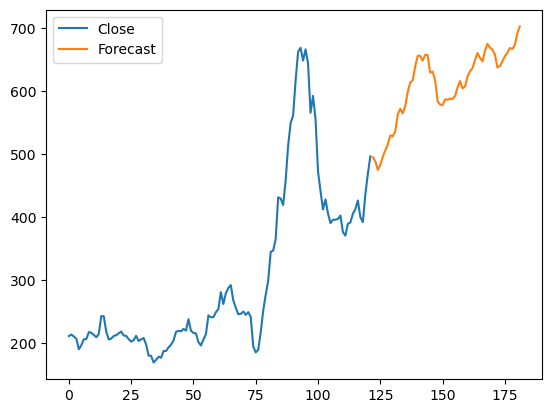

In [38]:
y.plot()